In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# define constants
RHO_ICE = 917 # kg/m^3
RHO_WATER = 1000 # kg/m^3
GRAVITY = 9.8 # m/s^2
SEC_PER_YEAR = 365*24*3600

# tuning params
uplift = 5e-3 # m/yr
slide_const = 1e-6
precip_rate = 0.001 # m/yr SWE
lapse_rate = 6.5 / 1000 # K/m
erosion_constant = 1e-2
melt_rate = 5 # m/(yr K) SWE

# simulation params
ela = 2500 # m
init_angle = 40 # degrees
init_height = ela
n_points = 500
dt = 1 # years
n_years = 500000

def mountain(angle, h0, n_points):
    angle_rad = np.radians(angle)
    x0 = h0 / np.tan(angle_rad)
    x_vals = np.linspace(0, 2*x0, 2*n_points)
    z_vals = x_vals[:n_points] * np.tan(angle_rad)
    return x_vals, np.r_[z_vals,z_vals[::-1]]

def mountain(angle, h0, n_points):
    angle_rad = np.radians(angle)
    x0 = h0 / np.tan(angle_rad)
    x_vals = np.linspace(0, x0, n_points)
    z_vals = x_vals * np.tan(angle_rad)
    return x_vals, z_vals

In [166]:
# approximate basal sliding speed based on the slope and ice thickness (m/yr)
def slide_speed(slide_const, ice_thickness, slope):
    safe_slope = np.clip(slope, -1e6, 1e6)
    sin_angle = safe_slope / np.sqrt(1+safe_slope**2)
    n=3
    A = 1e-24 * SEC_PER_YEAR
    # deform_speed = 2 * A / (n+1) * (RHO_ICE * GRAVITY * sin_angle)**n * ice_thickness ** (n+1)
    return - slide_const * RHO_ICE * GRAVITY * ice_thickness * sin_angle 

# erosion rate (m/yr)
def erosion(velocity, kg, l = 1):
    return kg * np.absolute(velocity) ** l

# temperature as a function of elevation
def temperature(z, ela, lapse_rate):
    return lapse_rate * (ela - z)

# melt rate (m/yr)
def melt(temp, melt_rate, precip_rate):
    return np.maximum(0, melt_rate * temp + precip_rate) * RHO_WATER / RHO_ICE

# precipitation rate (m/yr)
def precip(temp, precip_rate):
    return np.where(temp < 0, precip_rate * RHO_WATER / RHO_ICE, 0)

0.0 0.0 0.8390996311773686


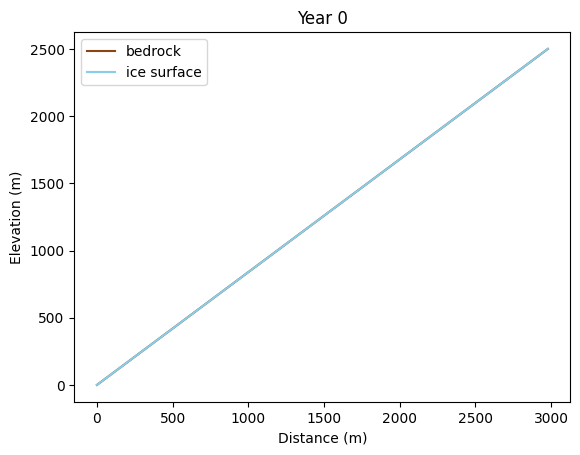

-0.06316725065197298 10.904032755812313 2.224474984559595


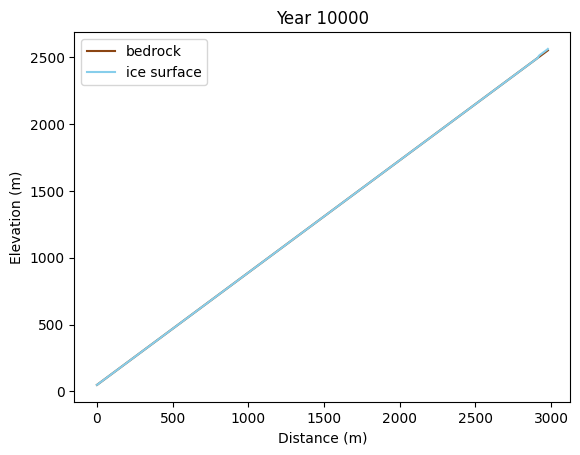

-0.13440834414865682 21.809158164758816 3.359778481170334


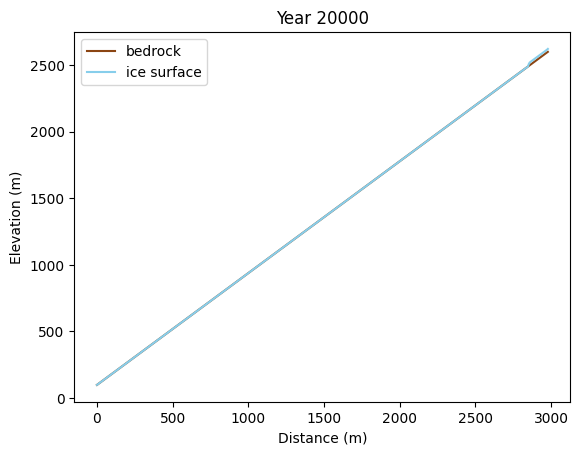

-0.2077980603671098 32.71428357370299 6.134523582366574


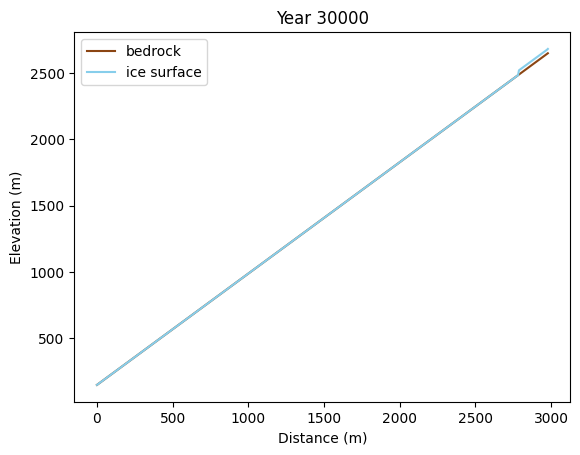

-0.2843018397806284 43.61940898261397 7.95901203127906


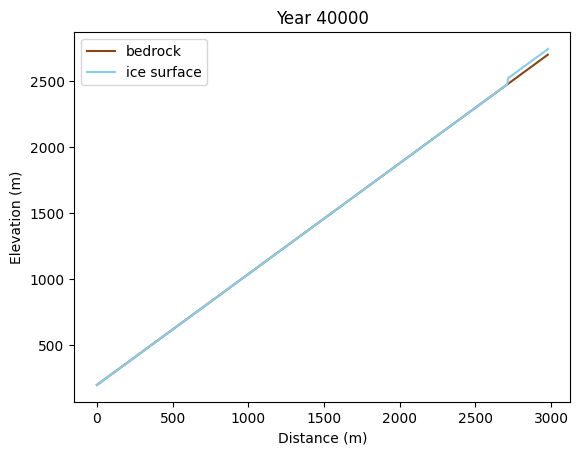

-0.36467911274693293 54.524534391524945 9.779125488781043


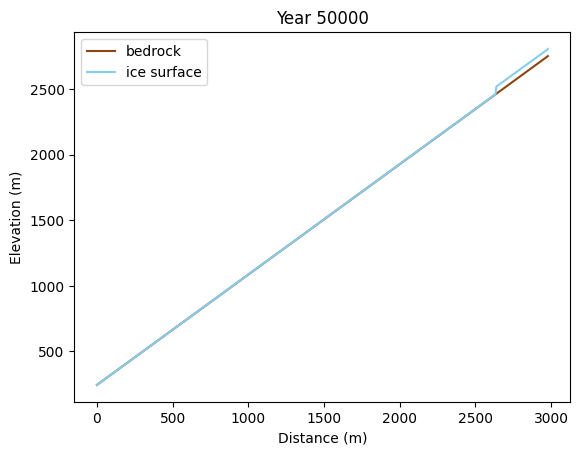

-0.44942159375534285 65.42965980044524 11.218819497156996


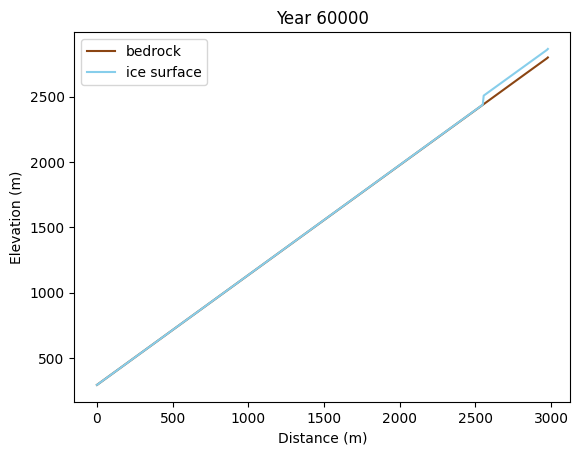

-0.5387118421160034 76.33478520942727 9.908607222632773


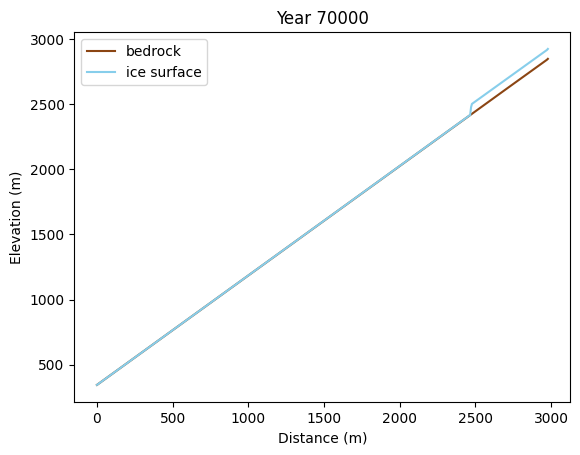

-0.6324149189997389 87.2399106184093 11.436435874832489


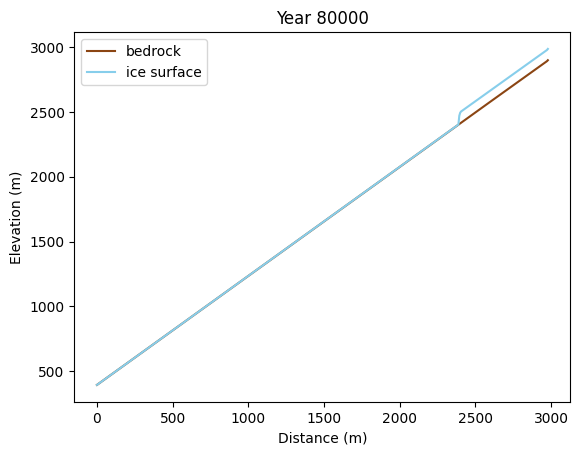

-0.7301110561597002 98.14503602739133 10.018410484731616


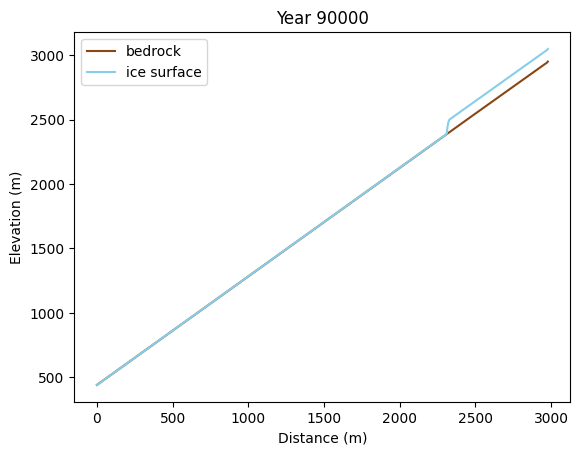

-0.8311667667759682 109.05016143637336 9.907990508088467


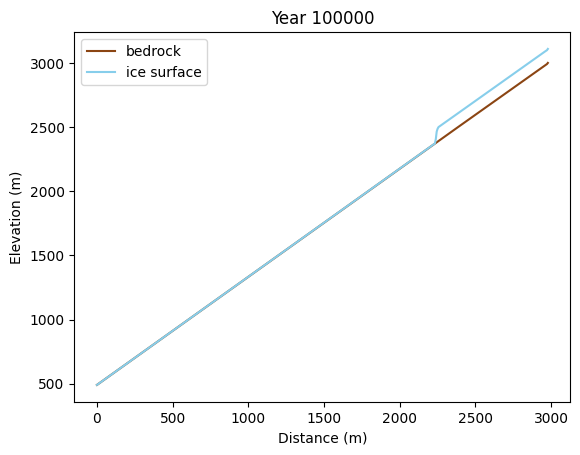

-0.9348300959386102 119.95528684535539 13.181334892125815


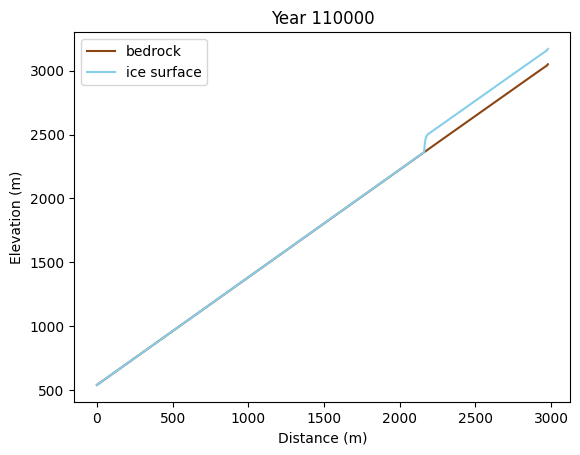

-1.0403287376212156 130.86041225430014 9.199637543287638


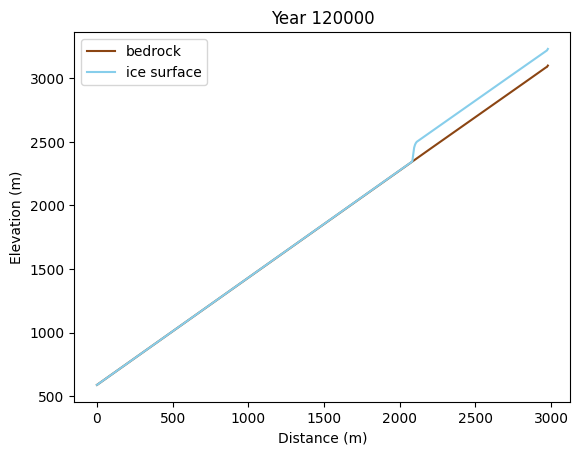

-1.1469510787205517 141.76553766314007 15.284609611942187


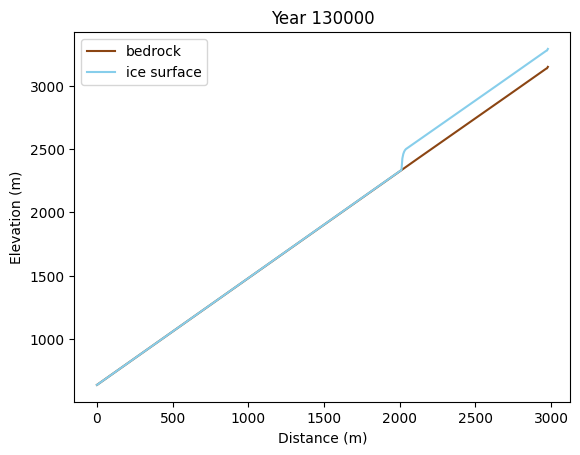

-1.2540984574314171 152.67066307198 11.18700659476161


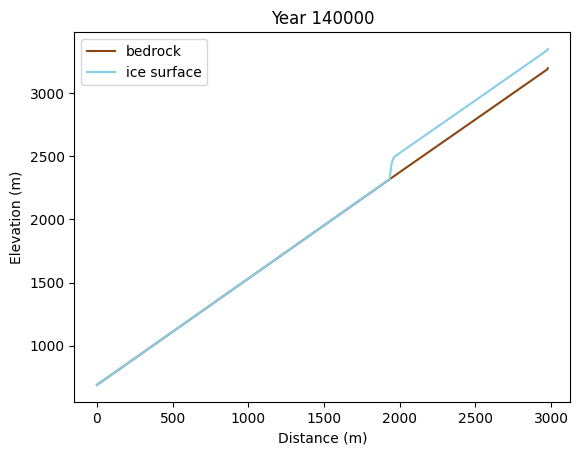

-1.361307153000801 163.5757884808199 16.323727465165618


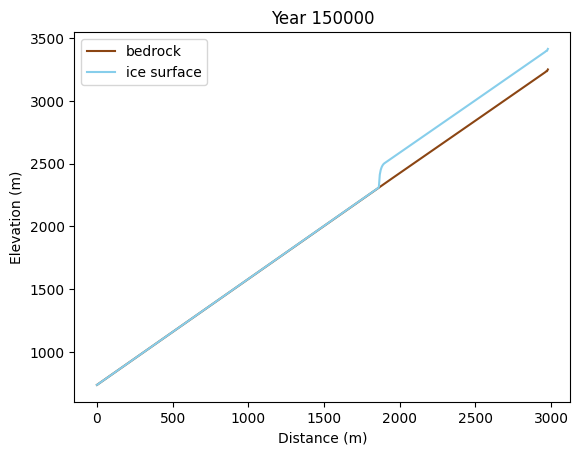

-1.4682462130330272 174.48091388965983 12.704789232556518


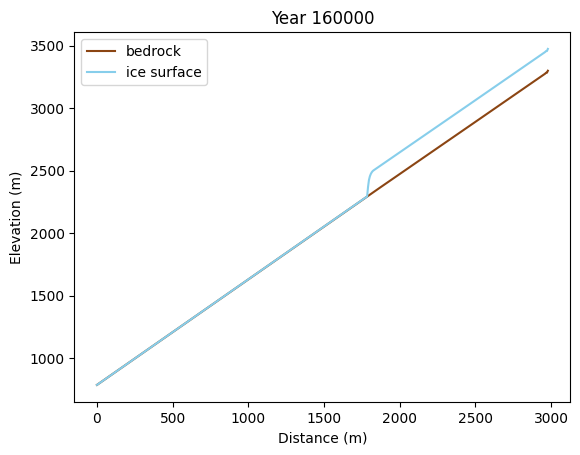

-1.5747002997439488 185.38603929849975 16.38469910886456


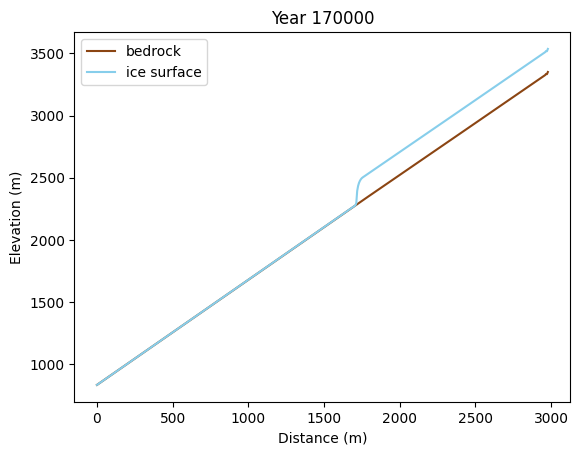

-1.6805460922215647 196.29116470733968 13.819052882371139


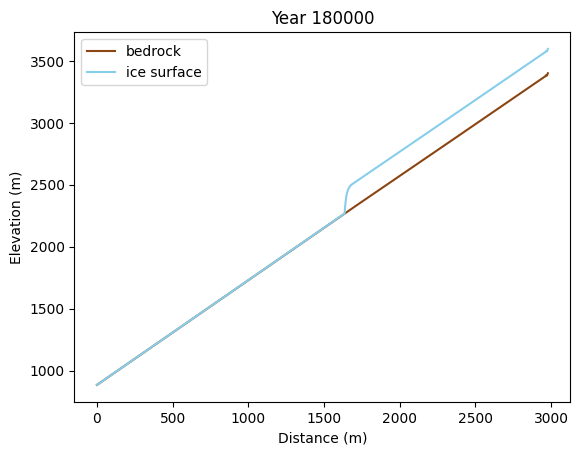

-1.7857283063992746 207.1962901161796 17.107313230190304


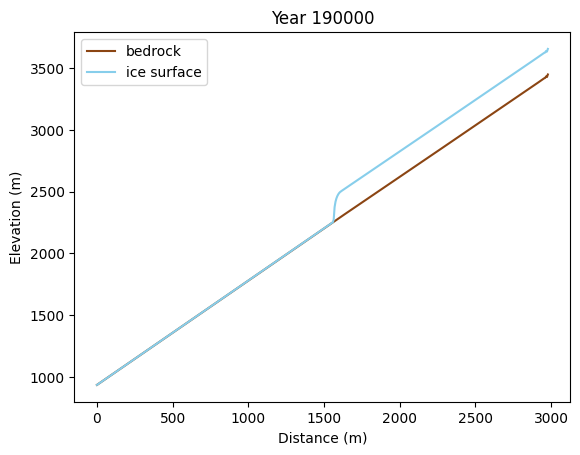

-1.8902387006923476 218.10141552501952 14.482867416697912


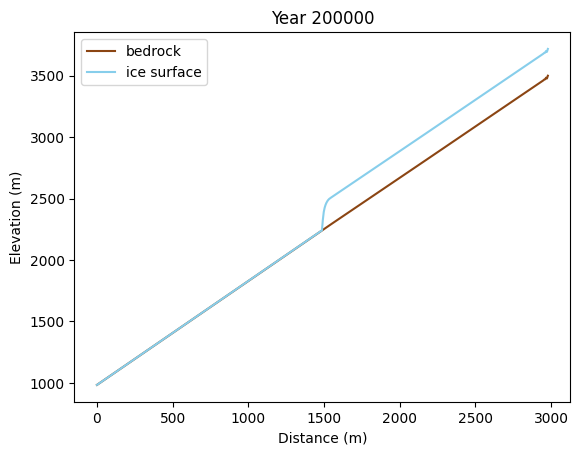

-1.9940993580565496 229.00654093385944 18.52997770377429


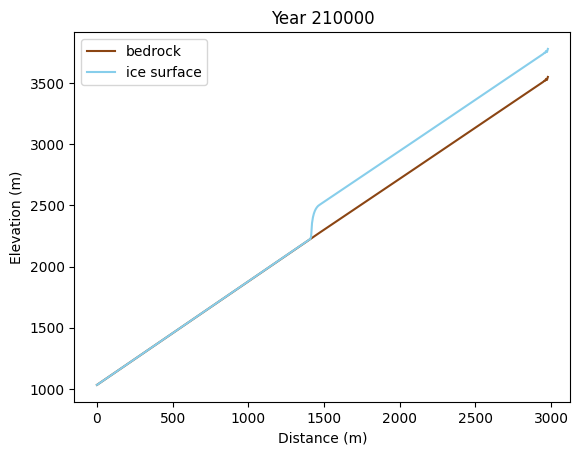

-2.097350261105682 239.91166634269936 14.603004827145735


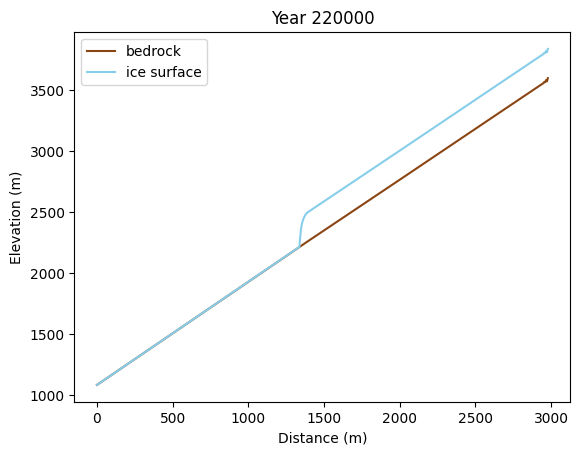

-2.200040559879893 250.81679175153928 20.78622109455386


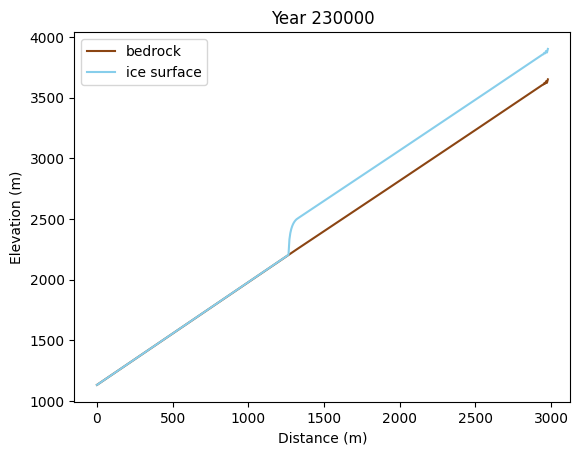

-2.3022227391302517 261.72191716037923 14.0399744117361


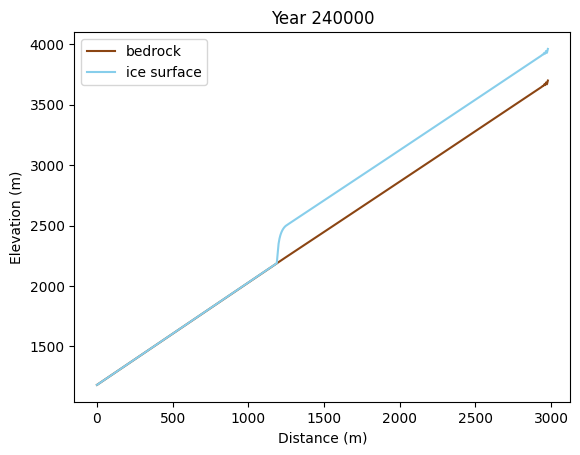

-2.403948924853497 272.62704256921916 21.287376787907768


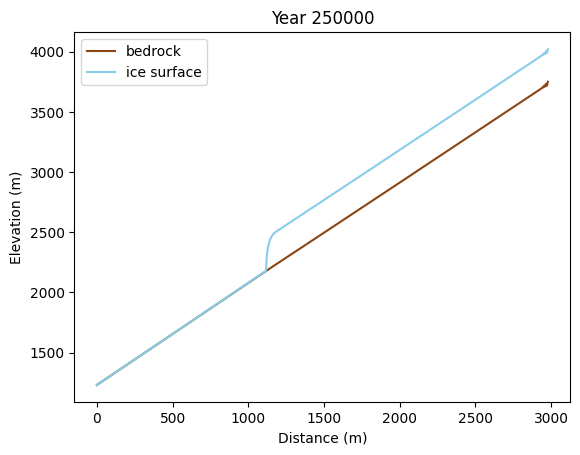

-2.5052686962398907 283.5321679780591 14.79563059135049


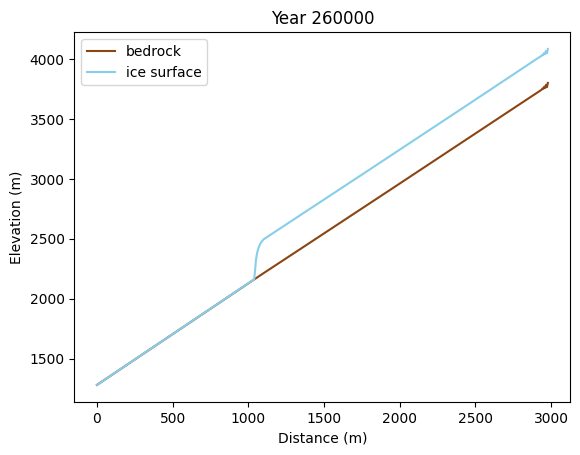

-2.6062279156068735 294.437293386899 20.679530793622444


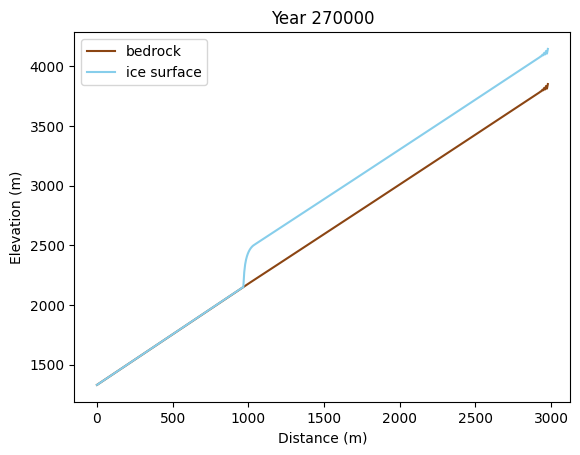

-2.7068682211131545 305.3424187957389 17.396839049046175


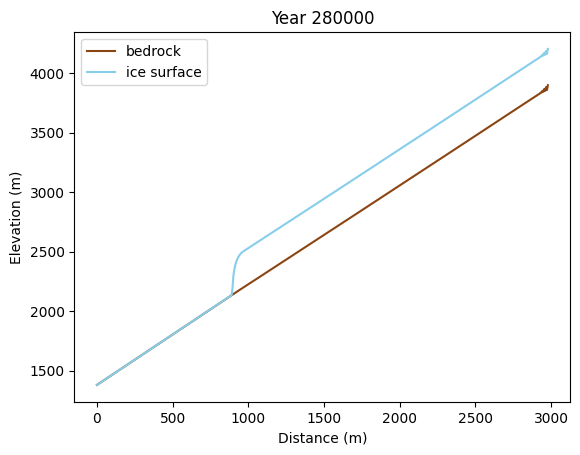

-2.807226933443004 316.24754420457884 19.273967355166004


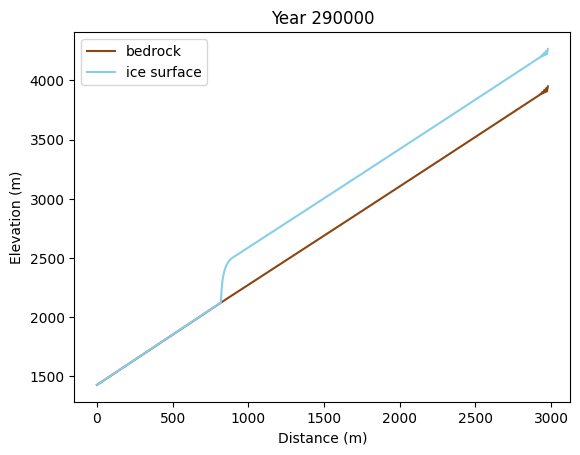

-2.9073372076459343 327.15266961341877 21.360334446624005


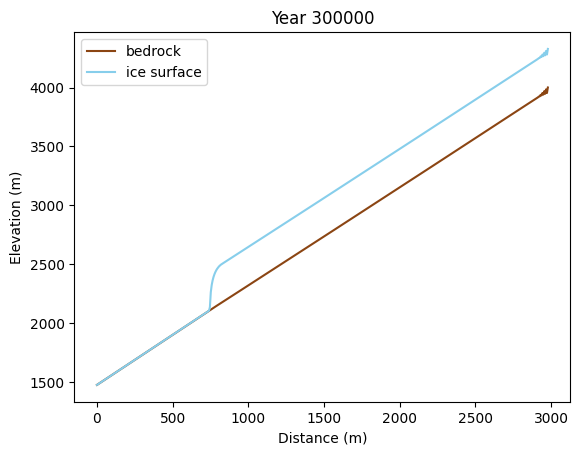

-3.00722831882617 338.0577950222587 16.782196714952793


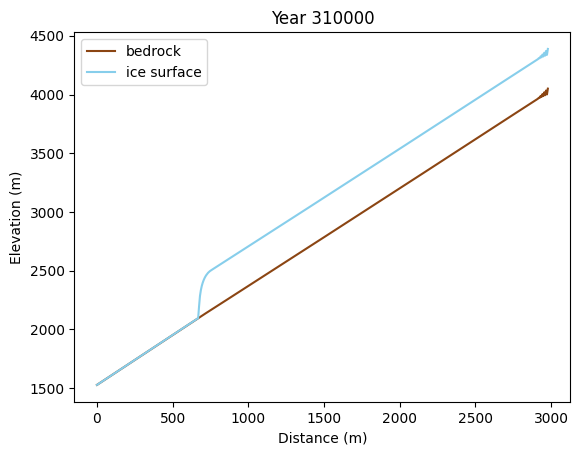

-3.1069260103884724 348.9629204310986 24.168220520054373


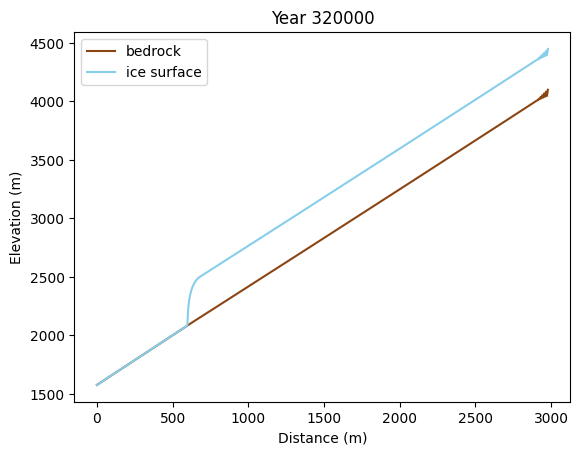

-3.206452860684641 359.86804583993853 17.90139102673165


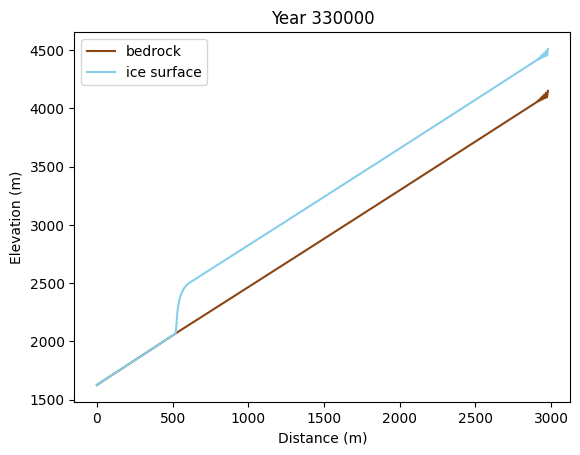

-3.3058286419029983 370.77317124877845 21.634525013172137


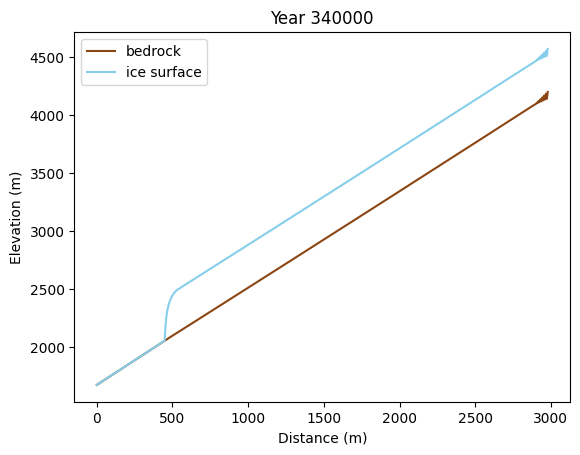

-3.4050706567309335 381.6782966576184 23.02089503436634


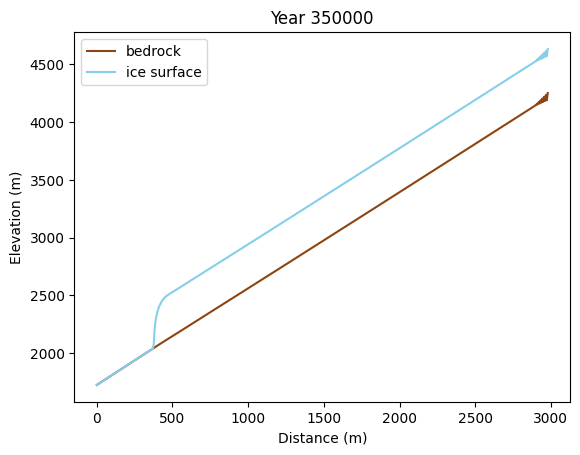

-3.5041940457331013 392.5834220664583 17.606920148357784


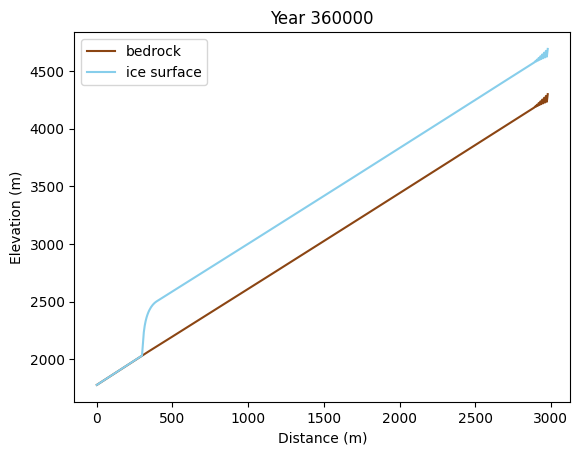

-3.6032120629612807 403.4885474752982 25.111423356651706


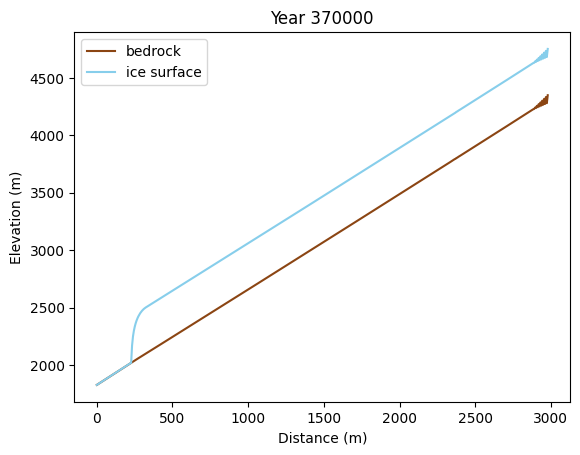

-3.702136320022536 414.39367288413814 21.543613988156604


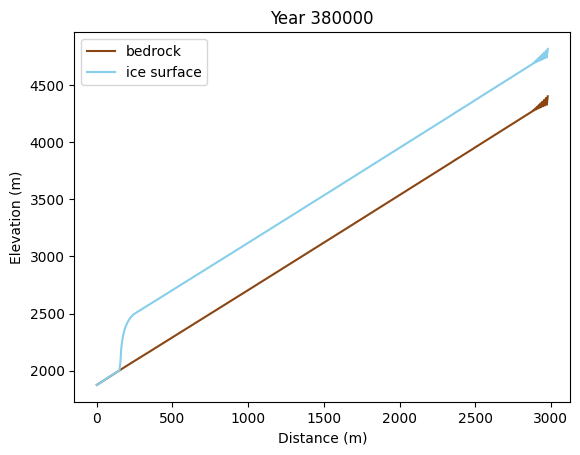

-3.8009770003496968 425.29879829297806 20.052121306942905


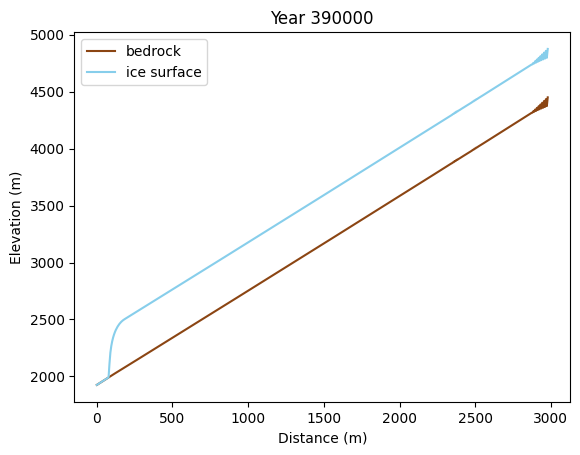

-3.8997430461768614 436.203923701818 27.10167493074962


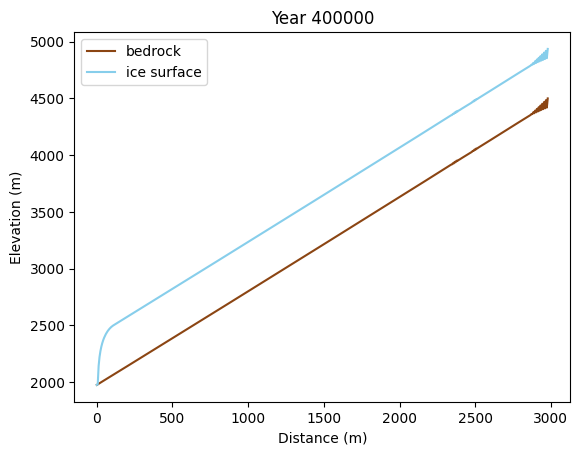

-3.998442321018711 447.1090491106579 14.326912385285668


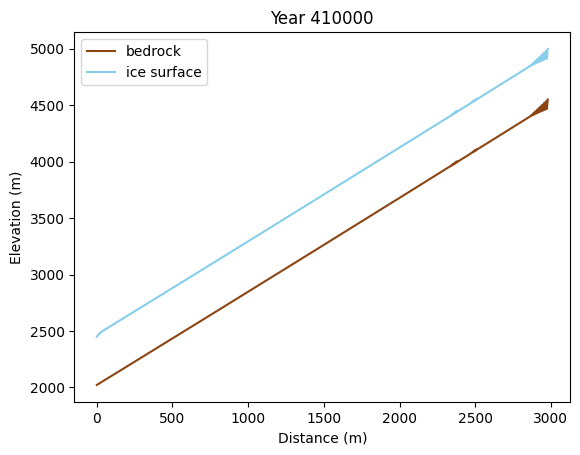

-4.097081750470776 458.01417451949783 15.004848886127018


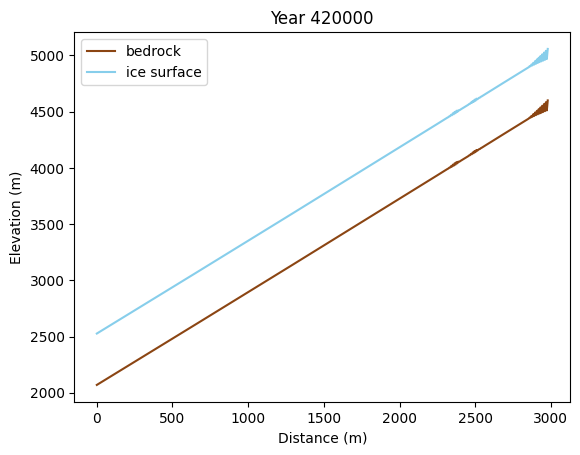

-4.195667444010613 468.91929992833775 15.699301361846366


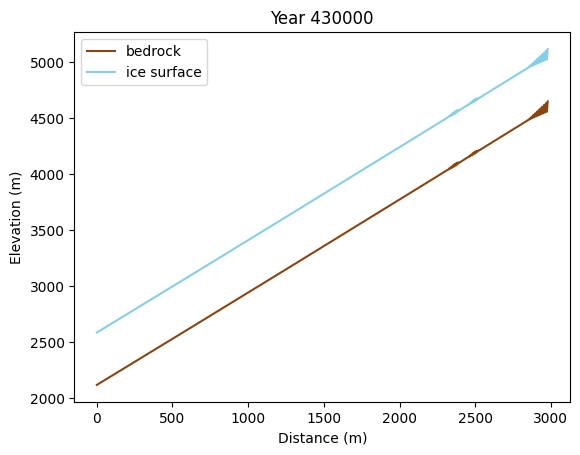

-4.29420480026294 479.8244253371777 16.410261273831544


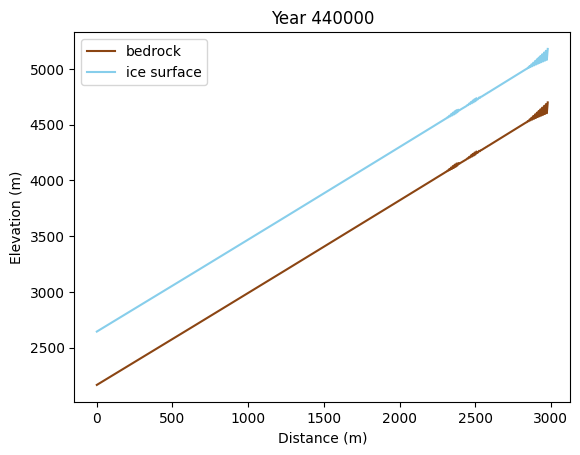

-4.392698597941829 490.7295507460176 17.137720934559095


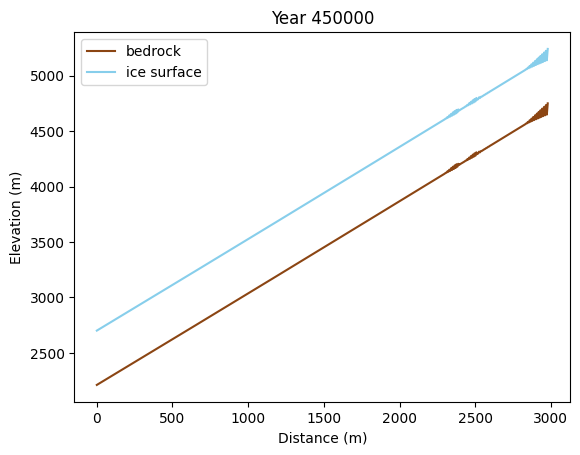

-4.491153074428123 501.6346761548575 17.881673410512605


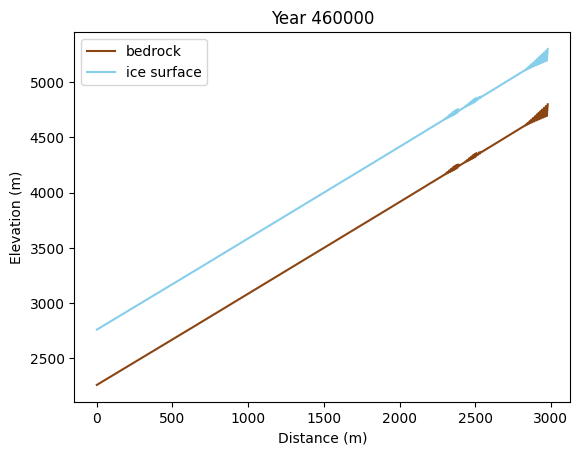

-4.589571993695885 512.5398015637255 18.64211243736953


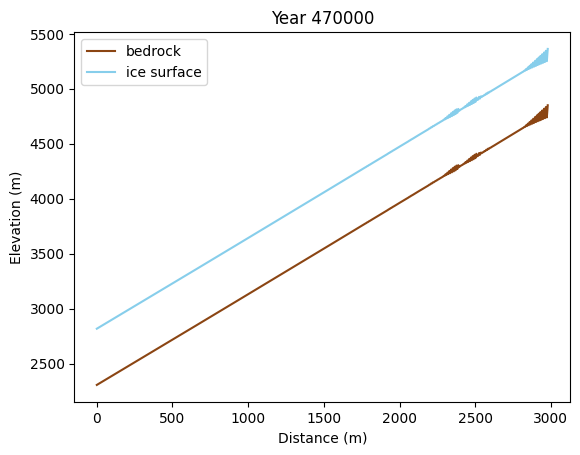

-4.687958705081352 523.4449269731339 19.41903234570827


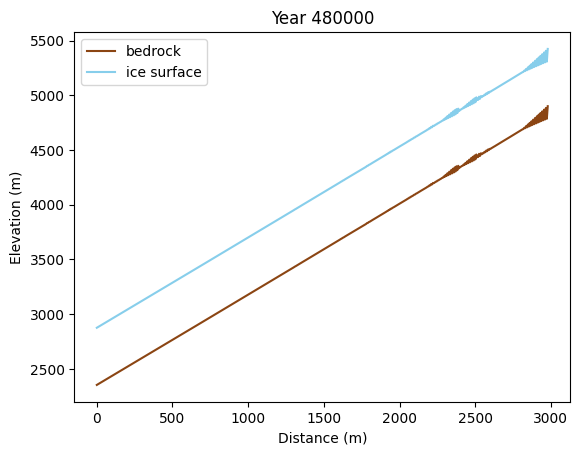

-4.786316194156537 534.3500523825422 20.212427995955025


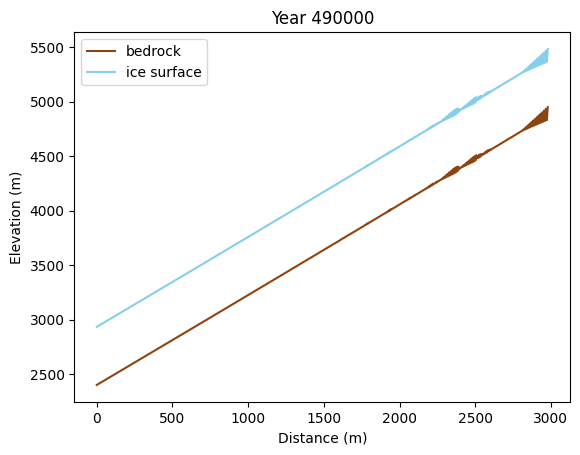

In [186]:
# initialize domain
x, bed = mountain(init_angle, init_height, n_points)
ice = np.zeros_like(bed)
dx = x[1] - x[0]

# time evolution
for t in range(int(n_years/dt)):
    # slope = np.gradient(bed, x)
    slope = np.r_[np.clip(np.diff(bed+ice),1e-6,1e6),[0]] / dx

    # temperature, accumulation, melt
    temp = temperature(bed + ice, ela, lapse_rate)
    snow = precip(temp, precip_rate)
    melt_amt = melt(temp, melt_rate, precip_rate)
    
    # update ice (mass balance)
    ice += (snow - melt_amt) * dt

    # compute sliding speed and erosion
    u = slide_speed(slide_const, ice, slope)
    E = erosion(u, erosion_constant)

    # simple downhill ice transport
    # flux = u * ice
    # ice[1:-1] -= dt * np.gradient(flux, x)[1:-1]

    ice[:-1] += np.diff(ice) * (-u[1:] * dt) / dx
    
    # update bed with uplift and erosion
    bed += uplift * dt - E * dt
    # bed += uplift * dt

    # prevent negative ice
    ice = np.maximum(ice, 0)

    # optional: visualize every few hundred years
    if t % 10000 == 0:
        print(np.min(u), np.max(ice), np.max(slope))
        plt.clf()
        plt.plot(x, bed, 'saddlebrown', label='bedrock')
        plt.plot(x, bed + ice, 'skyblue', label='ice surface')
        plt.title(f"Year {int(t*dt)}")
        plt.xlabel("Distance (m)")
        plt.ylabel("Elevation (m)")
        plt.legend()
        plt.pause(0.1)

plt.show()